In [108]:
# Notebook to get the electron and alpha from a Pb 210 decay
# Write to file so it can be read into the generator

%matplotlib inline

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = 11,9

In [109]:
input_file = "/Users/mistryk2/Packages/nexus/NEW_Pb210.next.h5"

In [110]:
h5 = tb.open_file(input_file, 'r')
parts = pd.read_hdf(input_file, 'MC/particles')

In [111]:
# Get all the mother ids from the Bi decay
pid = parts[ (parts["particle_name"] == "Bi210") ]
pid = pid[['event_id', 'particle_id']]
pid = pid.rename(columns = {"particle_id": "match"})

electron = parts.merge(pid, on = "event_id", how  = "left")

electron = electron.loc[ (electron['mother_id'] == electron['match']) & (electron["particle_name"] == "e-") ]

electron = electron.drop(columns = ["particle_id", "particle_name","primary", "mother_id", "initial_x", "initial_y", "initial_z", "initial_t", "final_x", "final_y", "final_z", "final_t","initial_volume", "final_volume", "final_momentum_x", "final_momentum_y", "final_momentum_z", "length", "creator_proc", "final_proc", "match"] )
electron = electron.set_index("event_id")
electron.to_csv("../data/pb210_electron.csv", header = False)
display(electron)

,initial_momentum_x,initial_momentum_y,initial_momentum_z,kin_energy
event_id,,,,
0,-0.161696,0.390028,0.098408,0.159129
1,0.800149,-0.482804,-0.085707,0.557553
2,1.086167,0.445038,-0.148886,0.777839
3,-0.055170,-0.113412,0.056207,0.018326
4,0.103302,0.405475,-0.522732,0.331290
...,...,...,...,...
9995,0.708091,0.174647,-0.782619,0.674542
9996,-0.284229,-0.294422,-0.810332,0.530744
9997,0.206952,0.279466,-0.049050,0.109047


Text(0.5, 0, 'Beta Energy [keV]')

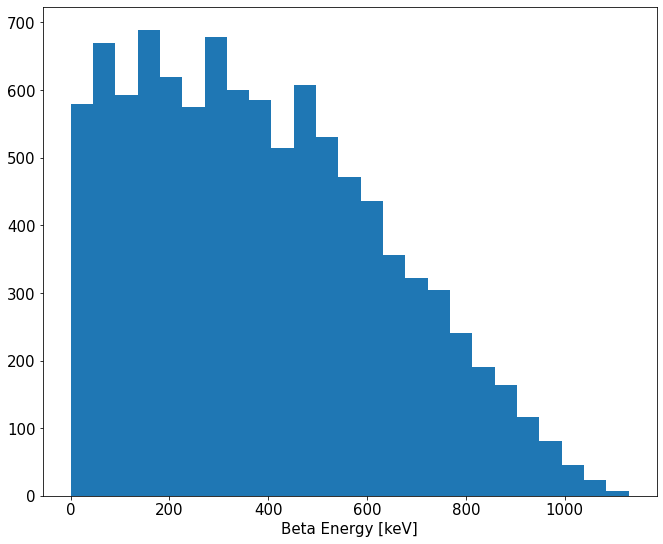

In [112]:
# Plot the spectrum of the electrons

plt.figure()
plt.hist(electron["kin_energy"]*1000, bins = 25)
plt.xlabel("Beta Energy [keV]")

In [113]:
# Get the alpha particles
alpha = parts[ parts["particle_name"] == "alpha"]
alpha = alpha.drop(columns = ["particle_id", "particle_name", "primary", "mother_id", "initial_x", "initial_y", "initial_z", "initial_t", "final_x", "final_y", "final_z", "final_t","initial_volume", "final_volume", "final_momentum_x", "final_momentum_y", "final_momentum_z", "length", "creator_proc", "final_proc"] )
alpha = alpha.set_index("event_id")
alpha.to_csv("../data/pb210_alpha.csv", header = False)
display(alpha)

,initial_momentum_x,initial_momentum_y,initial_momentum_z,kin_energy
event_id,,,,
0,-35.641953,-194.640350,-20.377476,5.304307
1,196.440506,-2.853983,-31.199989,5.304307
2,-163.947754,64.996010,-92.016891,5.304307
3,130.446457,142.354294,47.848064,5.304307
4,54.626728,-119.618324,149.257614,5.304307
...,...,...,...,...
9995,-130.118347,-108.790573,103.943672,5.304307
9996,176.292587,86.334305,32.214474,5.304307
9997,185.682724,-8.547873,-70.847145,5.304307
